# Overview of the data

In [133]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from matplotlib import cm

import os
from cl2pd import plotFunctions # cl2pd is deprecated but I'm lazy to copy paste juste a simple plotting function
import h5py

In [134]:
data_path = "DATA_MD/"

In [135]:
summ_plot_df = pd.read_pickle(data_path+'summary_plot_data.pkl')

In [136]:
# Crossing angle

T0 = summ_plot_df.index[0].to_pydatetime()
T1 = pd.Timestamp('2018-10-29 11:43:29.887000084+00:00', tz='CET').to_pydatetime()
T2 = pd.Timestamp('2018-10-29 12:04:57.258000135+00:00', tz='CET').to_pydatetime()
T3 = pd.Timestamp('2018-10-29 12:23:33.439000130+00:00', tz='CET').to_pydatetime()
T3bis = pd.Timestamp('2018-10-29 13:00:33.439000130+00:00', tz='CET').to_pydatetime()
T4 = summ_plot_df.index[-1].to_pydatetime()

/home/camontan/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3444: UserWarning: Discarding nonzero nanoseconds in conversion
  exec(code_obj, self.user_global_ns, self.user_ns)


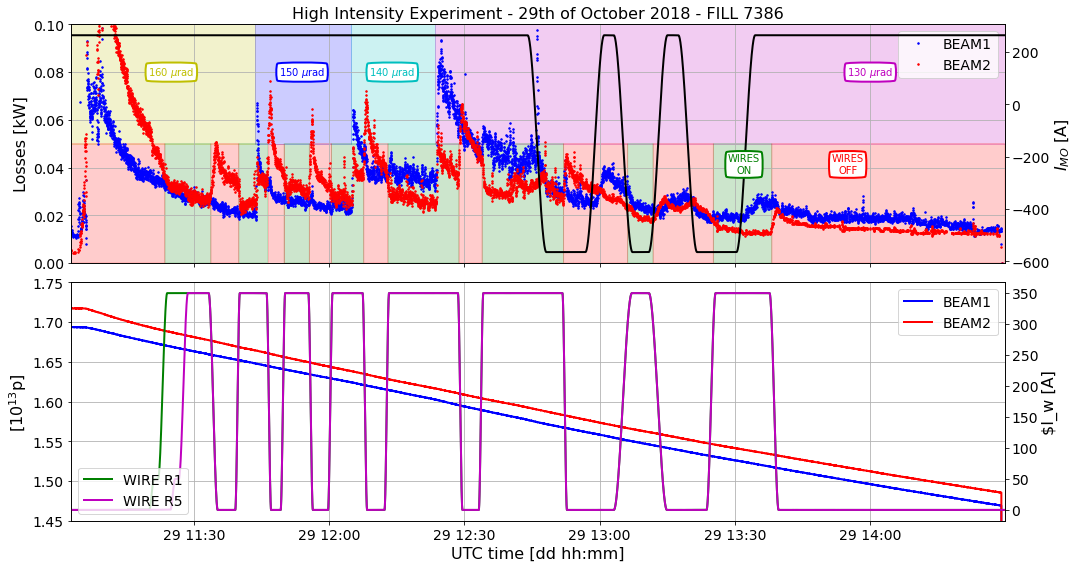

In [137]:
fig = plt.figure(figsize=(15,8))

ax1 = fig.add_subplot(211)
summ_plot_df['LHC.BLM.LIFETIME:B1_LOSS_KW'].dropna().plot(color='b',alpha=1,ls='None',marker='.',label='BEAM1',ms=3, zorder=2)
summ_plot_df['LHC.BLM.LIFETIME:B2_LOSS_KW'].dropna().plot(color='r',alpha=1,ls='None',marker='.',label='BEAM2',ms=3, zorder=2)

plotFunctions.setShadedRegion(plt.gca(), color='y', xLimit=[T0,T1], yLimit=[0.05,0.1],alpha=.2)
plotFunctions.setShadedRegion(plt.gca(), color='b', xLimit=[T1,T2], yLimit=[0.05,0.1],alpha=.2)
plotFunctions.setShadedRegion(plt.gca(), color='c', xLimit=[T2,T3], yLimit=[0.05,0.1],alpha=.2)
plotFunctions.setShadedRegion(plt.gca(), color='m', xLimit=[T3,T4], yLimit=[0.05,0.1],alpha=.2)

plotFunctions.setArrowLabel(plt.gca(), label='160 $\\mu$rad', \
                            arrowPosition=(pd.Timestamp('2018-10-29 12:25',tz='CET').to_pydatetime(),0.08),\
                            labelPosition=(pd.Timestamp('2018-10-29 12:25',tz='CET').to_pydatetime(),0.08), myColor='y')

plotFunctions.setArrowLabel(plt.gca(), label='150 $\\mu$rad', \
                            arrowPosition=(pd.Timestamp('2018-10-29 12:54',tz='CET').to_pydatetime(),0.08),\
                            labelPosition=(pd.Timestamp('2018-10-29 12:54',tz='CET').to_pydatetime(),0.08), myColor='b')


plotFunctions.setArrowLabel(plt.gca(), label='140 $\\mu$rad', \
                            arrowPosition=(pd.Timestamp('2018-10-29 13:14',tz='CET').to_pydatetime(),0.08),\
                            labelPosition=(pd.Timestamp('2018-10-29 13:14',tz='CET').to_pydatetime(),0.08), myColor='c')


plotFunctions.setArrowLabel(plt.gca(), label='130 $\\mu$rad', \
                            arrowPosition=(pd.Timestamp('2018-10-29 15:00',tz='CET').to_pydatetime(),0.08),\
                            labelPosition=(pd.Timestamp('2018-10-29 15:00',tz='CET').to_pydatetime(),0.08), myColor='m')




aux = summ_plot_df['RPMC.UL16.RBBCW.R1B2:I_MEAS'].dropna()
ax1.fill_between(aux.index, 0,0.05, where=aux>300,color='g', alpha=.2)
ax1.fill_between(aux.index, 0,0.05, where=aux<300,color='r', alpha=.2)



ax1.set_ylim([0,0.1])
ax1.tick_params(axis='y', labelsize=14)
ax1.tick_params(axis='x', labelbottom=False)

plt.grid()
plt.title('High Intensity Experiment - 29th of October 2018 - FILL 7386', fontsize=16)
ax1.set_ylabel('Losses [kW]', fontsize=16)
plt.legend(loc='upper right', fontsize=14)

ax2 = ax1.twinx()
ax2.plot(summ_plot_df['RPMBB.RR17.ROF.A12B2:I_MEAS'].dropna(),'k',lw=2,zorder=1)
ax2.set_ylabel('$I_{MO}$ [A]', fontsize=16)
ax2.tick_params(axis='y', colors='k')
ax2.yaxis.label.set_color('k')

ax2.tick_params(axis='y', labelsize=14)
ax2.tick_params(axis='x', labelbottom=False)


plotFunctions.setArrowLabel(plt.gca(), label='WIRES\nON', \
                            arrowPosition=(pd.Timestamp('2018-10-29 14:32',tz='CET').to_pydatetime(),-230),\
                            labelPosition=(pd.Timestamp('2018-10-29 14:32',tz='CET').to_pydatetime(),-230), myColor='g')

plotFunctions.setArrowLabel(plt.gca(), label='WIRES\nOFF', \
                            arrowPosition=(pd.Timestamp('2018-10-29 14:55',tz='CET').to_pydatetime(),-230),\
                            labelPosition=(pd.Timestamp('2018-10-29 14:55',tz='CET').to_pydatetime(),-230), myColor='r')



ax3 = fig.add_subplot(212,sharex=ax1)
ax3.plot((summ_plot_df['LHC.BCTDC.A6R4.B1:BEAM_INTENSITY'].dropna())/1e13,'b',lw=2,label='BEAM1')
ax3.plot((summ_plot_df['LHC.BCTDC.A6R4.B2:BEAM_INTENSITY'].dropna())/1e13,'r',lw=2,label='BEAM2')
ax3.set_ylim(1.45,1.75)
ax3.set_xlabel('UTC time [dd hh:mm]', fontsize=16)
ax3.set_ylabel('[$10^{13}$p]', fontsize=16)
ax3.legend(loc='upper right', fontsize=14)
ax3.grid()

ax3.tick_params(labelsize=14)

ax4 = ax3.twinx()
ax4.plot(summ_plot_df['RPMC.UL16.RBBCW.R1B2:I_MEAS'].dropna(),'g',lw=2,label='WIRE R1')
ax4.plot(summ_plot_df['RPMC.UL557.RBBCW.R5B2:I_MEAS'].dropna(),'m',lw=2,label='WIRE R5')
ax4.set_ylabel('$I_w [A]', fontsize=16)
ax4.legend(loc='lower left', fontsize=14)
ax4.tick_params(labelsize=14)


plt.xlim(T0,T4)
plt.tight_layout();


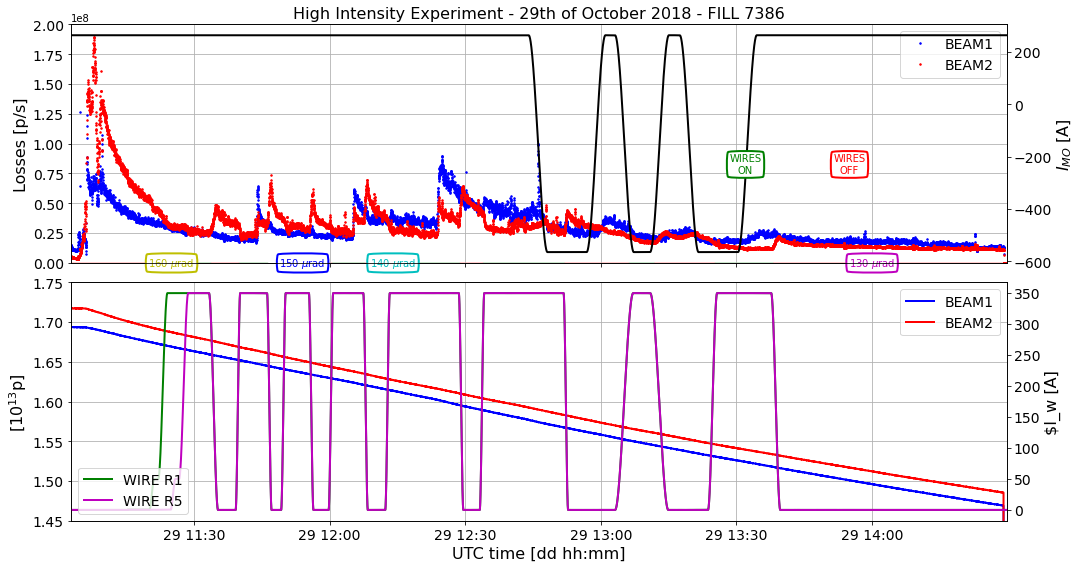

In [138]:
fig = plt.figure(figsize=(15,8))

ax1 = fig.add_subplot(211)
summ_plot_df['LHC.BLM.LIFETIME:B1_CALIBRATED_LOSS'].dropna().plot(color='b',alpha=1,ls='None',marker='.',label='BEAM1',ms=3, zorder=2)
summ_plot_df['LHC.BLM.LIFETIME:B2_CALIBRATED_LOSS'].dropna().plot(color='r',alpha=1,ls='None',marker='.',label='BEAM2',ms=3, zorder=2)

plotFunctions.setShadedRegion(plt.gca(), color='y', xLimit=[T0,T1], yLimit=[0.05,0.1],alpha=.2)
plotFunctions.setShadedRegion(plt.gca(), color='b', xLimit=[T1,T2], yLimit=[0.05,0.1],alpha=.2)
plotFunctions.setShadedRegion(plt.gca(), color='c', xLimit=[T2,T3], yLimit=[0.05,0.1],alpha=.2)
plotFunctions.setShadedRegion(plt.gca(), color='m', xLimit=[T3,T4], yLimit=[0.05,0.1],alpha=.2)

plotFunctions.setArrowLabel(plt.gca(), label='160 $\\mu$rad', \
                            arrowPosition=(pd.Timestamp('2018-10-29 12:25',tz='CET').to_pydatetime(),0.08),\
                            labelPosition=(pd.Timestamp('2018-10-29 12:25',tz='CET').to_pydatetime(),0.08), myColor='y')

plotFunctions.setArrowLabel(plt.gca(), label='150 $\\mu$rad', \
                            arrowPosition=(pd.Timestamp('2018-10-29 12:54',tz='CET').to_pydatetime(),0.08),\
                            labelPosition=(pd.Timestamp('2018-10-29 12:54',tz='CET').to_pydatetime(),0.08), myColor='b')


plotFunctions.setArrowLabel(plt.gca(), label='140 $\\mu$rad', \
                            arrowPosition=(pd.Timestamp('2018-10-29 13:14',tz='CET').to_pydatetime(),0.08),\
                            labelPosition=(pd.Timestamp('2018-10-29 13:14',tz='CET').to_pydatetime(),0.08), myColor='c')


plotFunctions.setArrowLabel(plt.gca(), label='130 $\\mu$rad', \
                            arrowPosition=(pd.Timestamp('2018-10-29 15:00',tz='CET').to_pydatetime(),0.08),\
                            labelPosition=(pd.Timestamp('2018-10-29 15:00',tz='CET').to_pydatetime(),0.08), myColor='m')




aux = summ_plot_df['RPMC.UL16.RBBCW.R1B2:I_MEAS'].dropna()
ax1.fill_between(aux.index, 0,0.05, where=aux>300,color='g', alpha=.2)
ax1.fill_between(aux.index, 0,0.05, where=aux<300,color='r', alpha=.2)



ax1.set_ylim([0,2e8])
ax1.tick_params(axis='y', labelsize=14)
ax1.tick_params(axis='x', labelbottom=False)

plt.grid()
plt.title('High Intensity Experiment - 29th of October 2018 - FILL 7386', fontsize=16)
ax1.set_ylabel('Losses [p/s]', fontsize=16)
plt.legend(loc='upper right', fontsize=14)

ax2 = ax1.twinx()
ax2.plot(summ_plot_df['RPMBB.RR17.ROF.A12B2:I_MEAS'].dropna(),'k',lw=2,zorder=1)
ax2.set_ylabel('$I_{MO}$ [A]', fontsize=16)
ax2.tick_params(axis='y', colors='k')
ax2.yaxis.label.set_color('k')

ax2.tick_params(axis='y', labelsize=14)
ax2.tick_params(axis='x', labelbottom=False)


plotFunctions.setArrowLabel(plt.gca(), label='WIRES\nON', \
                            arrowPosition=(pd.Timestamp('2018-10-29 14:32',tz='CET').to_pydatetime(),-230),\
                            labelPosition=(pd.Timestamp('2018-10-29 14:32',tz='CET').to_pydatetime(),-230), myColor='g')

plotFunctions.setArrowLabel(plt.gca(), label='WIRES\nOFF', \
                            arrowPosition=(pd.Timestamp('2018-10-29 14:55',tz='CET').to_pydatetime(),-230),\
                            labelPosition=(pd.Timestamp('2018-10-29 14:55',tz='CET').to_pydatetime(),-230), myColor='r')



ax3 = fig.add_subplot(212,sharex=ax1)
ax3.plot((summ_plot_df['LHC.BCTDC.A6R4.B1:BEAM_INTENSITY'].dropna())/1e13,'b',lw=2,label='BEAM1')
ax3.plot((summ_plot_df['LHC.BCTDC.A6R4.B2:BEAM_INTENSITY'].dropna())/1e13,'r',lw=2,label='BEAM2')
ax3.set_ylim(1.45,1.75)
ax3.set_xlabel('UTC time [dd hh:mm]', fontsize=16)
ax3.set_ylabel('[$10^{13}$p]', fontsize=16)
ax3.legend(loc='upper right', fontsize=14)
ax3.grid()

ax3.tick_params(labelsize=14)

ax4 = ax3.twinx()
ax4.plot(summ_plot_df['RPMC.UL16.RBBCW.R1B2:I_MEAS'].dropna(),'g',lw=2,label='WIRE R1')
ax4.plot(summ_plot_df['RPMC.UL557.RBBCW.R5B2:I_MEAS'].dropna(),'m',lw=2,label='WIRE R5')
ax4.set_ylabel('$I_w [A]', fontsize=16)
ax4.legend(loc='lower left', fontsize=14)
ax4.tick_params(labelsize=14)


plt.xlim(T0,T4)
plt.tight_layout();


(just gathering the data that we need here...)

In [139]:
def convert_datetime_to_seconds(df):
    df.index = df.index.view(np.int64)
    df.index = df.index/1e9
    return df

In [140]:
beam_1_loss = convert_datetime_to_seconds(summ_plot_df['LHC.BLM.LIFETIME:B1_CALIBRATED_LOSS'].dropna())
beam_2_loss = convert_datetime_to_seconds(summ_plot_df['LHC.BLM.LIFETIME:B2_CALIBRATED_LOSS'].dropna())

beam_1_intensity = convert_datetime_to_seconds(summ_plot_df['LHC.BCTDC.A6R4.B1:BEAM_INTENSITY'].dropna())
beam_2_intensity = convert_datetime_to_seconds(summ_plot_df['LHC.BCTDC.A6R4.B1:BEAM_INTENSITY'].dropna())

In [141]:
minimum_point = np.min(np.concatenate([
    beam_1_loss.index,
    beam_2_loss.index,
    beam_1_intensity.index,
    beam_2_intensity.index
]))
print(f"Minimum point: {minimum_point}")
beam_1_loss.index = beam_1_loss.index - minimum_point
beam_2_loss.index = beam_2_loss.index - minimum_point
beam_1_intensity.index = beam_1_intensity.index - minimum_point
beam_2_intensity.index = beam_2_intensity.index - minimum_point

t0 = T0.timestamp() - minimum_point
t1 = T1.timestamp() - minimum_point
t2 = T2.timestamp() - minimum_point
t3 = T3.timestamp() - minimum_point
t3bis = T3bis.timestamp() - minimum_point
t4 = T4.timestamp() - minimum_point

Minimum point: 1540810965.653


In [142]:
aux = summ_plot_df['RPMC.UL16.RBBCW.R1B2:I_MEAS'].dropna()
aux_i = summ_plot_df['RPMC.UL16.RBBCW.R1B2:I_MEAS'].dropna()

In [143]:
# mark every entry of aux > 300 as true
aux[aux < 300] = False
aux[aux > 300] = True

aux_i[aux_i < 300] = True
aux_i[aux_i > 300] = False

In [144]:
turn_on_list = []
turn_off_list = []
for i in aux.loc[aux.diff() == True].index:
    turn_on_list.append(i.timestamp() - minimum_point)
turn_on_list.append(aux.index[-1].timestamp()- minimum_point)

turn_off_list.append(aux.index[0].timestamp()- minimum_point)
for i in aux_i.loc[aux_i.diff() == True].index:
    turn_off_list.append(i.timestamp()- minimum_point)

In [145]:
on_intervals = []
off_intervals = []

for i in range(len(turn_on_list)-1):
    on_intervals.append([turn_on_list[i], turn_off_list[i+1]])

for i in range(len(turn_off_list)):
    off_intervals.append([turn_off_list[i], turn_on_list[i]])

In [146]:
wire_intervals = [
    ["off", t[0], t[1]] for t in off_intervals
] + [
    ["on", t[0], t[1]] for t in on_intervals
]
wire_intervals.sort(key=lambda x: x[1])
print(wire_intervals)

[['off', 0.026999950408935547, 1248.026999950409], ['on', 1248.026999950409, 1860.026999950409], ['off', 1860.026999950409, 2231.526999950409], ['on', 2231.526999950409, 2616.526999950409], ['off', 2616.526999950409, 2835.526999950409], ['on', 2835.526999950409, 3172.526999950409], ['off', 3172.526999950409, 3465.526999950409], ['on', 3465.526999950409, 3894.026999950409], ['off', 3894.026999950409, 4217.526999950409], ['on', 4217.526999950409, 5162.526999950409], ['off', 5162.526999950409, 5472.026999950409], ['on', 5472.026999950409, 6553.526999950409], ['off', 6553.526999950409, 7406.026999950409], ['on', 7406.026999950409, 7746.526999950409], ['off', 7746.526999950409, 8548.526999950409], ['on', 8548.526999950409, 9324.026999950409], ['off', 9324.026999950409, 12421.026999950409]]


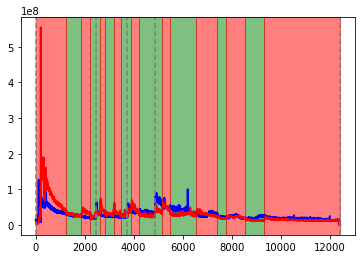

In [147]:
plt.plot(beam_1_loss, 'b', lw=2, label='BEAM1')
plt.plot(beam_2_loss, 'r', lw=2, label='BEAM2')

plt.axvline(x=t0, color='grey', linestyle='--', label='T0')
plt.axvline(x=t1, color='grey', linestyle='--', label='T1')
plt.axvline(x=t2, color='grey', linestyle='--', label='T2')
plt.axvline(x=t3, color='grey', linestyle='--', label='T3')
# plt.axvline(x=t3bis, color='grey', linestyle='--', label='T3bis')
plt.axvline(x=t4, color='grey', linestyle='--', label='T4')

for i in on_intervals:
    plt.axvspan(i[0], i[1], color='green', alpha=0.5)

for i in off_intervals:
    plt.axvspan(i[0], i[1], color='red', alpha=0.5)

In [367]:
data_dict = {
    "angles_only": {
        "b1": {
            "angle": [],
            "skip_idx": [],
            "results": [],
            "loss": [],
            "intensity": []
        },
        "b2": {
            "angle": [],
            "skip_idx": [],
            "results": [],
            "loss": [],
            "intensity": []
        }
    },
    "angles_and_wire": {
        "b1": {
            "angle": [],
            "wire": [],
            "skip_idx": [],
            "results": [],
            "loss": [],
            "intensity": []
        },
        "b2": {
            "angle": [],
            "wire": [],
            "skip_idx": [],
            "results": [],
            "loss": [],
            "intensity": []
        }
    }
}

In [368]:
angle_intervals = [
    ["160 $\\mu$rad", t0, t1],
    ["150 $\\mu$rad", t1, t2],
    ["140 $\\mu$rad", t2, t3],
    ["130 $\\mu$rad", t3, t4]
]

In [369]:
for angle in angle_intervals:
    data_dict["angles_only"]["b1"]["angle"].append(angle[0])
    data_dict["angles_only"]["b2"]["angle"].append(angle[0])
    
    data_dict["angles_only"]["b1"]["skip_idx"].append(0)
    data_dict["angles_only"]["b2"]["skip_idx"].append(0)

    data_dict["angles_only"]["b1"]["results"].append(None)
    data_dict["angles_only"]["b2"]["results"].append(None)
    
    data_dict["angles_only"]["b1"]["intensity"].append(
        beam_1_intensity.loc[angle[1]:angle[2]]
    )
    data_dict["angles_only"]["b2"]["intensity"].append(
        beam_2_intensity.loc[angle[1]:angle[2]]
    )
    data_dict["angles_only"]["b1"]["loss"].append(
        beam_1_loss.loc[angle[1]:angle[2]]
    )
    data_dict["angles_only"]["b2"]["loss"].append(
        beam_2_loss.loc[angle[1]:angle[2]]
    )

In [370]:
for angle in angle_intervals:
    b1_intensity = beam_1_intensity.loc[angle[1]:angle[2]]
    b2_intensity = beam_2_intensity.loc[angle[1]:angle[2]]
    b1_loss = beam_1_loss.loc[angle[1]:angle[2]]
    b2_loss = beam_2_loss.loc[angle[1]:angle[2]]
    for wire in wire_intervals:
        data_dict["angles_and_wire"]["b1"]["skip_idx"].append(0)
        data_dict["angles_and_wire"]["b2"]["skip_idx"].append(0)
        data_dict["angles_and_wire"]["b1"]["results"].append(None)
        data_dict["angles_and_wire"]["b2"]["results"].append(None)
        if len(b1_loss.loc[wire[1]:wire[2]]) > 0:
            data_dict["angles_and_wire"]["b1"]["angle"].append(angle[0])
            data_dict["angles_and_wire"]["b1"]["wire"].append(wire[0])
            data_dict["angles_and_wire"]["b1"]["loss"].append(
                b1_loss.loc[wire[1]:wire[2]]
            )
            data_dict["angles_and_wire"]["b1"]["intensity"].append(
                b1_intensity.loc[wire[1]:wire[2]]
            )
        if len(b2_loss.loc[wire[1]:wire[2]]) > 0:
            data_dict["angles_and_wire"]["b2"]["angle"].append(angle[0])
            data_dict["angles_and_wire"]["b2"]["wire"].append(wire[0])
            data_dict["angles_and_wire"]["b2"]["loss"].append(
                b2_loss.loc[wire[1]:wire[2]]
            )
            data_dict["angles_and_wire"]["b2"]["intensity"].append(
                b2_intensity.loc[wire[1]:wire[2]]
            )

In [371]:
data_dict["angles_only"]["b1"]["skip_idx"][0] = 350
data_dict["angles_only"]["b2"]["skip_idx"][0] = 350
data_dict["angles_and_wire"]["b1"]["skip_idx"][0] = 350
data_dict["angles_and_wire"]["b2"]["skip_idx"][0] = 350

In [365]:
import numpy as np
import pandas as pd
from scipy.special import lambertw
import matplotlib.pyplot as plt
import pickle
import lmfit
import scipy.interpolate

from scipy.misc import derivative

In [320]:
TURNS_PER_SECOND = 11245.0

In [321]:
def relative_wrap(n, d_func, **kwargs):
    return 1 - (1 + np.power(d_func(n, **kwargs), 2)) * np.exp(-np.power(d_func(n, **kwargs), 2))


In [322]:
def model_2(n, rho, kappa):
    return rho * np.power(kappa / (2 * np.exp(1)), kappa) * np.power(1 / np.log(n), kappa)

def wrap_2(n, rho, kappa):
    return relative_wrap(n, model_2, rho=rho, kappa=kappa)

def wrap_2_d(n, rho, kappa):
    return 2*kappa*rho**2*(kappa*np.exp(-1)/2)**(2*kappa)*(-rho**2*(kappa*np.exp(-1)/2)**(2*kappa)/np.log(n)**(2*kappa) - 1)*np.exp(-rho**2*(kappa*np.exp(-1)/2)**(2*kappa)/np.log(n)**(2*kappa)) / \
        (n*np.log(n)*np.log(n)**(2*kappa)) + 2*kappa*rho**2*(kappa*np.exp(-1)/2)**(2*kappa) * \
        np.exp(-rho**2*(kappa*np.exp(-1)/2)**(2*kappa)/np.log(n)
               ** (2*kappa))/(n*np.log(n)*np.log(n)**(2*kappa))

In [323]:
def model_4(n, rho, kappa):
    return rho * np.power(
        -np.exp(1) * lambertw(
            -(1 / (np.exp(1))) * np.power(rho / 6, 1 / kappa) * np.power(n * 8 / 7, -2/kappa),
            -1
        ),
        -kappa)

def wrap_4(n, rho, kappa):
    return relative_wrap(n, model_4, rho=rho, kappa=kappa)

def wrap_4_d(n, rho, kappa):
    result = -4*rho**2*(-rho**2/(-np.exp(1)*lambertw(-(rho/6)**(1/kappa)*np.exp(-1)/(8*n/7)**(2/kappa), -1))**(2*kappa) - 1)*np.exp(-rho**2/(-np.exp(1)*lambertw(-(rho/6)**(1/kappa)*np.exp(-1)/(8*n/7)**(2/kappa), -1))**(2*kappa))/(n*(-np.exp(1)*lambertw(-(rho/6)**(1/kappa)*np.exp(-1)/(8*n/7)**(2/kappa), -1))**(2*kappa)*(lambertw(-(rho/6) ** (1/kappa)*np.exp(-1)/(8*n/7)**(2/kappa), -1) + 1)) - 4*rho**2*np.exp(-rho**2/(-np.exp(1)*lambertw(-(rho/6)**(1/kappa)*np.exp(-1)/(8*n/7)**(2/kappa), -1))**(2*kappa))/(n*(-np.exp(1)*lambertw(-(rho/6)**(1/kappa)*np.exp(-1)/(8*n/7)**(2/kappa), -1))**(2*kappa)*(lambertw(-(rho/6)**(1/kappa)*np.exp(-1)/(8*n/7)**(2/kappa), -1) + 1))
    return result.real

In [328]:
def resid(params, x, y, model="model_4"):
    rho = params['rho'].value
    kappa = params['kappa'].value
    a = params['a'].value
    if model == "model_4":
        model = wrap_4_d(x + a, rho, kappa)
    elif model == "model_2":
        model = wrap_2_d(x + a, rho, kappa)
    else:
        raise ValueError("Model not recognized")
    # keep real part of model only
    model = model.real
    if np.isnan(model).any():
        print(rho, kappa, a)
        return y + 1e10
    return y + model

In [430]:
def fit_data(loss, intensity, n0=2, skip=0, vary_a=False):
    # init parameters for lmfit
    params = lmfit.Parameters()
    params.add('rho', value=10.5, min=0)
    params.add('kappa', value=0.33, min=0.01)
    params.add('a', value=0, vary=vary_a, min=0)

    # get intensity_0
    intensity_0 = scipy.interpolate.interp1d(intensity.index, intensity.to_numpy(), fill_value="extrapolate")(loss.index[0])

    # prepare the loss data
    x = np.asarray(loss.index, dtype=float) * TURNS_PER_SECOND
    original_x = x[skip:].copy()
    y = (loss.to_numpy() / intensity_0) / TURNS_PER_SECOND

    # skip the first few points
    x = x[skip:]
    y = y[skip:]

    # set the offset
    x -= x[0]
    x += n0

    # fit the data
    result = lmfit.minimize(resid, params, args=(x, y))
    return result, x, y, original_x

In [431]:
n_angles = len(data_dict["angles_only"]["b1"]["loss"]) 
for idx in range(n_angles):
    result, x, y, original_x = fit_data(
        data_dict["angles_only"]["b1"]["loss"][idx],
        beam_1_intensity,
        n0=10,
        skip=data_dict["angles_only"]["b1"]["skip_idx"][idx],
        vary_a=True
    )
    data_dict["angles_only"]["b1"]["results"][idx] = (result, x, y, original_x)

for idx in range(n_angles):
    result, x, y, original_x = fit_data(
        data_dict["angles_only"]["b2"]["loss"][idx],
        beam_1_intensity,
        n0=10,
        skip=data_dict["angles_only"]["b2"]["skip_idx"][idx],
        vary_a=True
    )
    data_dict["angles_only"]["b2"]["results"][idx] = (result, x, y, original_x)

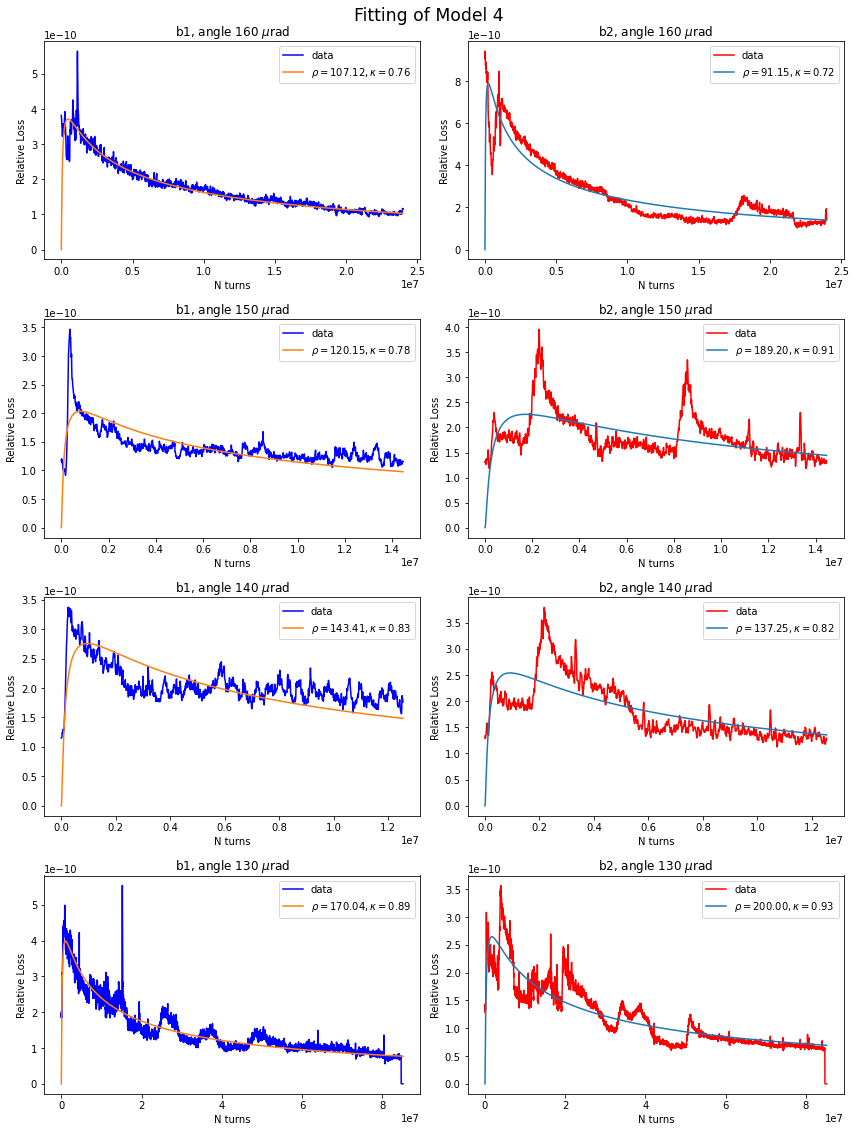

In [432]:
fig, axs = plt.subplots(n_angles, 2, figsize=(12, 4 * n_angles))
for idx in range(n_angles):
    result, x, y, original_x = data_dict["angles_only"]["b1"]["results"][idx]
    axs[idx, 0].plot(x, y, label="data", c="Blue")
    axs[idx, 0].plot(x, y - result.residual, c="C1",
        label=f"$\\rho={result.params['rho'].value:.2f}, \\kappa={result.params['kappa'].value:.2f}$")
    axs[idx, 0].set_title(f"b1, angle {data_dict['angles_only']['b1']['angle'][idx]}")
    axs[idx, 0].legend()
    axs[idx, 0].set_xlabel("N turns")
    axs[idx, 0].set_ylabel("Relative Loss")

    result, x, y, original_x = data_dict["angles_only"]["b2"]["results"][idx]
    axs[idx, 1].plot(x, y, label="data", c="Red")
    axs[idx, 1].plot(x, y - result.residual, c="C0",
        label=f"$\\rho={result.params['rho'].value:.2f}, \\kappa={result.params['kappa'].value:.2f}$")
    axs[idx, 1].set_title(f"b2, angle {data_dict['angles_only']['b2']['angle'][idx]}")
    axs[idx, 1].legend()
    axs[idx, 1].set_xlabel("N turns")
    axs[idx, 1].set_ylabel("Relative Loss")

fig.suptitle("Fitting of Model 4", fontsize="xx-large")

plt.tight_layout()


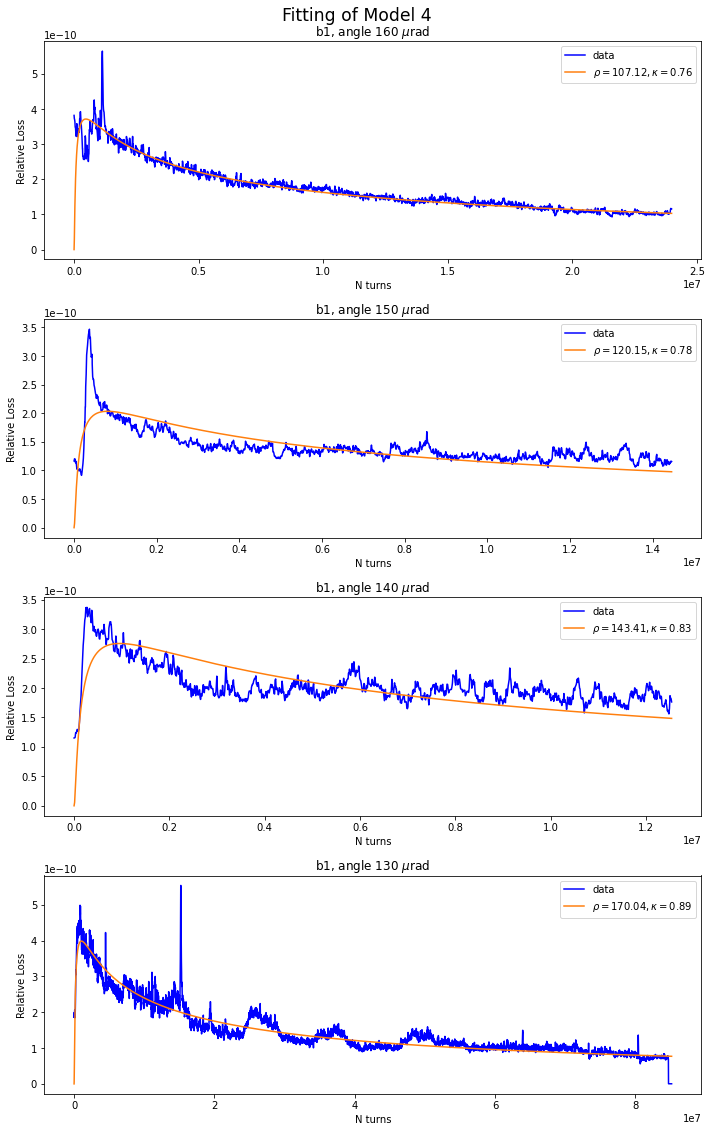

In [466]:
fig, axs = plt.subplots(n_angles, 1, figsize=(10, 4 * n_angles))
for idx in range(n_angles):
    result, x, y, original_x = data_dict["angles_only"]["b1"]["results"][idx]
    axs[idx].plot(x, y, label="data", c="Blue")
    axs[idx].plot(x, y - result.residual, c="C1",
        label=f"$\\rho={result.params['rho'].value:.2f}, \\kappa={result.params['kappa'].value:.2f}$")
    axs[idx].set_title(f"b1, angle {data_dict['angles_only']['b1']['angle'][idx]}")
    axs[idx].legend()
    axs[idx].set_xlabel("N turns")
    axs[idx].set_ylabel("Relative Loss")

fig.suptitle("Fitting of Model 4", fontsize="xx-large")

plt.tight_layout()


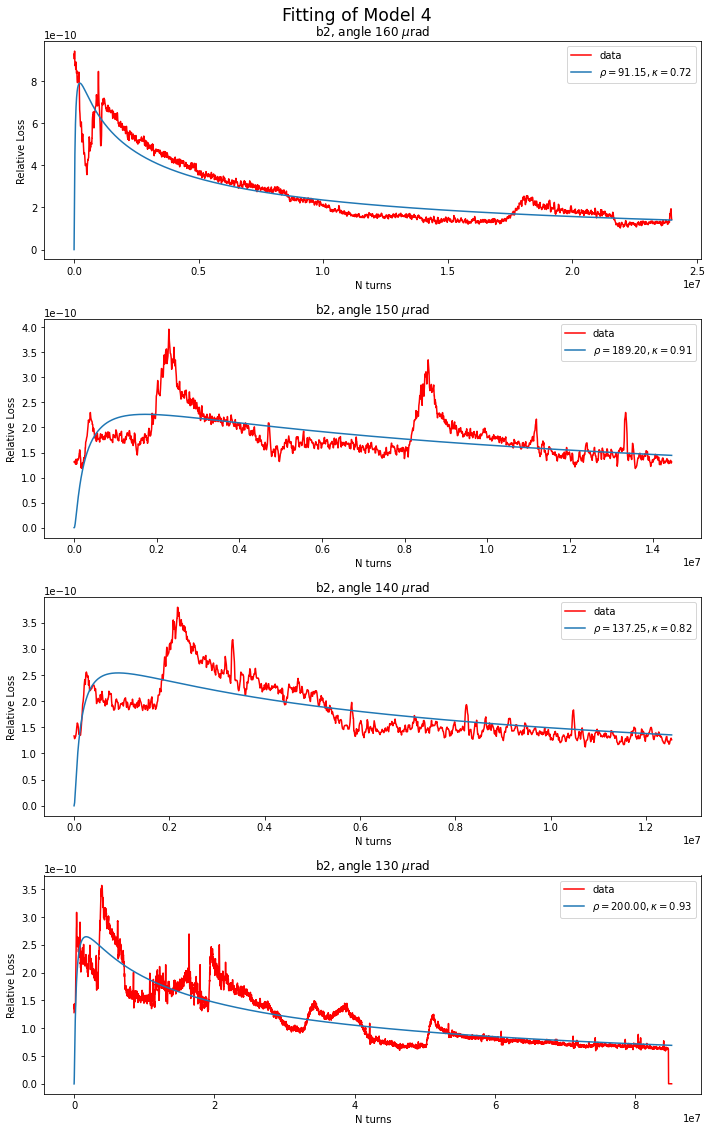

In [467]:
fig, axs = plt.subplots(n_angles, 1, figsize=(10, 4 * n_angles))
for idx in range(n_angles):
    result, x, y, original_x = data_dict["angles_only"]["b2"]["results"][idx]
    axs[idx].plot(x, y, label="data", c="Red")
    axs[idx].plot(x, y - result.residual, c="C0",
        label=f"$\\rho={result.params['rho'].value:.2f}, \\kappa={result.params['kappa'].value:.2f}$")
    axs[idx].set_title(f"b2, angle {data_dict['angles_only']['b2']['angle'][idx]}")
    axs[idx].legend()
    axs[idx].set_xlabel("N turns")
    axs[idx].set_ylabel("Relative Loss")

fig.suptitle("Fitting of Model 4", fontsize="xx-large")

plt.tight_layout()


In [433]:
n_samples = len(data_dict["angles_and_wire"]["b1"]["loss"]) 
for idx in range(n_samples):
    result, x, y, original_x = fit_data(
        data_dict["angles_and_wire"]["b1"]["loss"][idx],
        beam_1_intensity,
        n0=10,
        skip=data_dict["angles_and_wire"]["b1"]["skip_idx"][idx],
    )
    data_dict["angles_and_wire"]["b1"]["results"][idx] = (result, x, y, original_x)

for idx in range(n_samples):
    result, x, y, original_x = fit_data(
        data_dict["angles_and_wire"]["b2"]["loss"][idx],
        beam_1_intensity,
        n0=10,
        skip=data_dict["angles_and_wire"]["b2"]["skip_idx"][idx],
    )
    data_dict["angles_and_wire"]["b2"]["results"][idx] = (result, x, y, original_x)

4


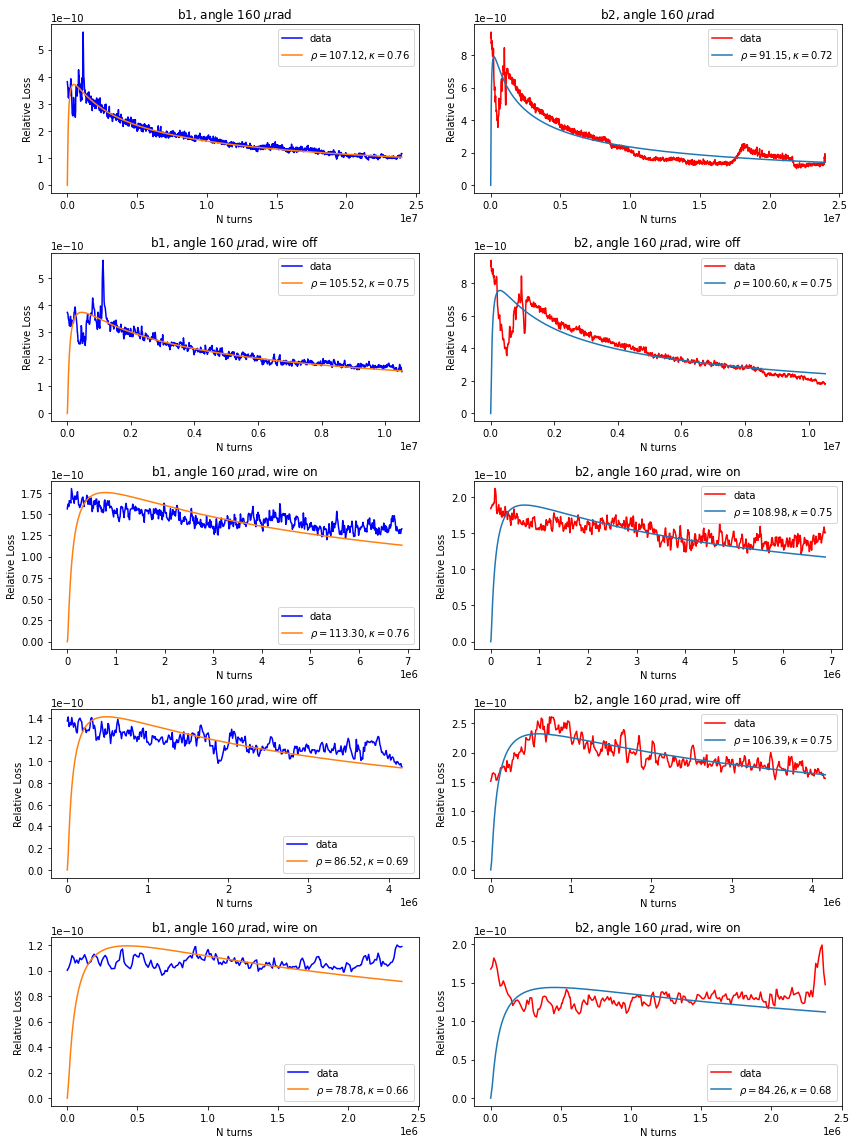

In [417]:
idx = 0
angle = data_dict["angles_only"]["b1"]["angle"][idx]

counter = 0
for j in range(n_samples):
    if data_dict["angles_and_wire"]["b1"]["angle"][j] == angle:
        counter += 1
print(counter)
fig, axs = plt.subplots(counter + 1, 2, figsize=(12, 4 * counter))

result, x, y, original_x = data_dict["angles_only"]["b1"]["results"][idx]
axs[0, 0].plot(x, y, label="data", c="Blue")
axs[0, 0].plot(x, y - result.residual, c="C1",
    label=f"$\\rho={result.params['rho'].value:.2f}, \\kappa={result.params['kappa'].value:.2f}$")
axs[0, 0].set_title(f"b1, angle {data_dict['angles_only']['b1']['angle'][idx]}")
axs[0, 0].legend()
axs[0, 0].set_xlabel("N turns")
axs[0, 0].set_ylabel("Relative Loss")

result, x, y, original_x = data_dict["angles_only"]["b2"]["results"][idx]
axs[0, 1].plot(x, y, label="data", c="Red")
axs[0, 1].plot(x, y - result.residual, c="C0",
    label=f"$\\rho={result.params['rho'].value:.2f}, \\kappa={result.params['kappa'].value:.2f}$")
axs[0, 1].set_title(f"b2, angle {data_dict['angles_only']['b2']['angle'][idx]}")
axs[0, 1].legend()
axs[0, 1].set_xlabel("N turns")
axs[0, 1].set_ylabel("Relative Loss")

counter = 0
for j in range(n_samples):
    if data_dict["angles_and_wire"]["b1"]["angle"][j] == angle:
        counter += 1
        result, x, y, original_x = data_dict["angles_and_wire"]["b1"]["results"][j]
        axs[counter, 0].plot(x, y, label="data", c="Blue")
        axs[counter, 0].plot(x, y - result.residual, c="C1",
            label=f"$\\rho={result.params['rho'].value:.2f}, \\kappa={result.params['kappa'].value:.2f}$")
        axs[counter, 0].set_title(f"b1, angle {data_dict['angles_and_wire']['b1']['angle'][j]}, wire {data_dict['angles_and_wire']['b1']['wire'][j]}")
        axs[counter, 0].legend()
        axs[counter, 0].set_xlabel("N turns")
        axs[counter, 0].set_ylabel("Relative Loss")

        result, x, y, original_x = data_dict["angles_and_wire"]["b2"]["results"][j]
        axs[counter, 1].plot(x, y, label="data", c="Red")
        axs[counter, 1].plot(x, y - result.residual, c="C0",
            label=f"$\\rho={result.params['rho'].value:.2f}, \\kappa={result.params['kappa'].value:.2f}$")
        axs[counter, 1].set_title(f"b2, angle {data_dict['angles_and_wire']['b2']['angle'][j]}, wire {data_dict['angles_and_wire']['b2']['wire'][j]}")
        axs[counter, 1].legend()
        axs[counter, 1].set_xlabel("N turns")
        axs[counter, 1].set_ylabel("Relative Loss")
        
    
plt.tight_layout()

5


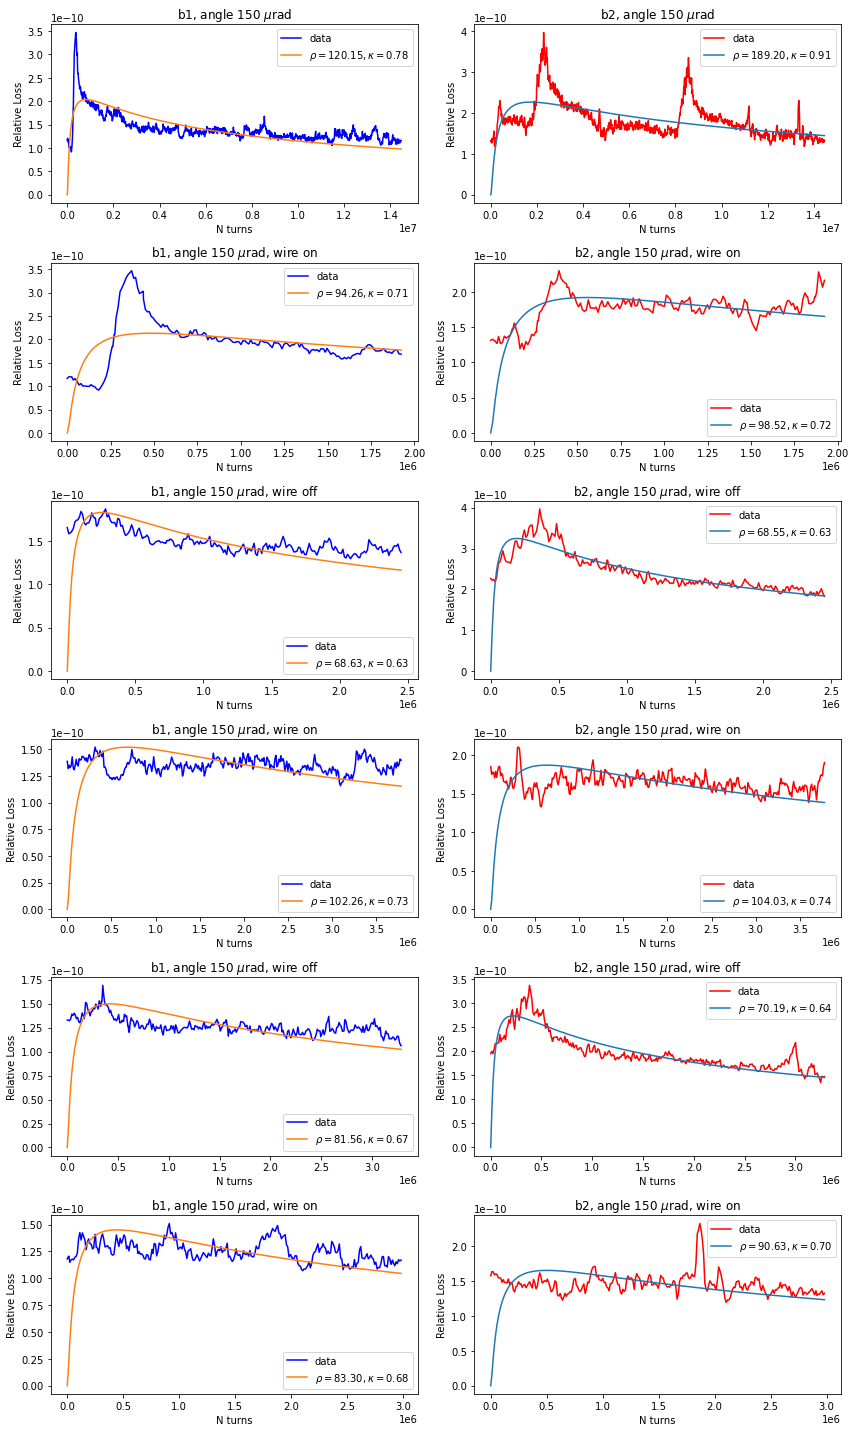

In [418]:
idx = 1
angle = data_dict["angles_only"]["b1"]["angle"][idx]

counter = 0
for j in range(n_samples):
    if data_dict["angles_and_wire"]["b1"]["angle"][j] == angle:
        counter += 1
print(counter)
fig, axs = plt.subplots(counter + 1, 2, figsize=(12, 4 * counter))

result, x, y, original_x = data_dict["angles_only"]["b1"]["results"][idx]
axs[0, 0].plot(x, y, label="data", c="Blue")
axs[0, 0].plot(x, y - result.residual, c="C1",
    label=f"$\\rho={result.params['rho'].value:.2f}, \\kappa={result.params['kappa'].value:.2f}$")
axs[0, 0].set_title(f"b1, angle {data_dict['angles_only']['b1']['angle'][idx]}")
axs[0, 0].legend()
axs[0, 0].set_xlabel("N turns")
axs[0, 0].set_ylabel("Relative Loss")

result, x, y, original_x = data_dict["angles_only"]["b2"]["results"][idx]
axs[0, 1].plot(x, y, label="data", c="Red")
axs[0, 1].plot(x, y - result.residual, c="C0",
    label=f"$\\rho={result.params['rho'].value:.2f}, \\kappa={result.params['kappa'].value:.2f}$")
axs[0, 1].set_title(f"b2, angle {data_dict['angles_only']['b2']['angle'][idx]}")
axs[0, 1].legend()
axs[0, 1].set_xlabel("N turns")
axs[0, 1].set_ylabel("Relative Loss")

counter = 0
for j in range(n_samples):
    if data_dict["angles_and_wire"]["b1"]["angle"][j] == angle:
        counter += 1
        result, x, y, original_x = data_dict["angles_and_wire"]["b1"]["results"][j]
        axs[counter, 0].plot(x, y, label="data", c="Blue")
        axs[counter, 0].plot(x, y - result.residual, c="C1",
            label=f"$\\rho={result.params['rho'].value:.2f}, \\kappa={result.params['kappa'].value:.2f}$")
        axs[counter, 0].set_title(f"b1, angle {data_dict['angles_and_wire']['b1']['angle'][j]}, wire {data_dict['angles_and_wire']['b1']['wire'][j]}")
        axs[counter, 0].legend()
        axs[counter, 0].set_xlabel("N turns")
        axs[counter, 0].set_ylabel("Relative Loss")

        result, x, y, original_x = data_dict["angles_and_wire"]["b2"]["results"][j]
        axs[counter, 1].plot(x, y, label="data", c="Red")
        axs[counter, 1].plot(x, y - result.residual, c="C0",
            label=f"$\\rho={result.params['rho'].value:.2f}, \\kappa={result.params['kappa'].value:.2f}$")
        axs[counter, 1].set_title(f"b2, angle {data_dict['angles_and_wire']['b2']['angle'][j]}, wire {data_dict['angles_and_wire']['b2']['wire'][j]}")
        axs[counter, 1].legend()
        axs[counter, 1].set_xlabel("N turns")
        axs[counter, 1].set_ylabel("Relative Loss")
        
    
plt.tight_layout()

3


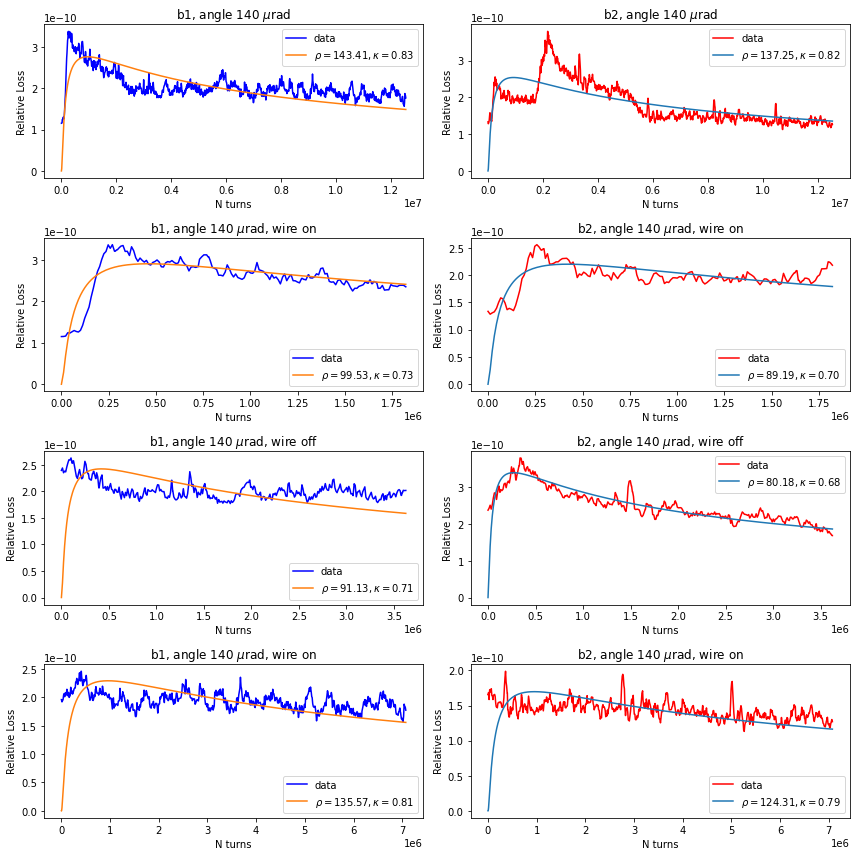

In [419]:
idx = 2
angle = data_dict["angles_only"]["b1"]["angle"][idx]

counter = 0
for j in range(n_samples):
    if data_dict["angles_and_wire"]["b1"]["angle"][j] == angle:
        counter += 1
print(counter)
fig, axs = plt.subplots(counter + 1, 2, figsize=(12, 4 * counter))

result, x, y, original_x = data_dict["angles_only"]["b1"]["results"][idx]
axs[0, 0].plot(x, y, label="data", c="Blue")
axs[0, 0].plot(x, y - result.residual, c="C1",
    label=f"$\\rho={result.params['rho'].value:.2f}, \\kappa={result.params['kappa'].value:.2f}$")
axs[0, 0].set_title(f"b1, angle {data_dict['angles_only']['b1']['angle'][idx]}")
axs[0, 0].legend()
axs[0, 0].set_xlabel("N turns")
axs[0, 0].set_ylabel("Relative Loss")

result, x, y, original_x = data_dict["angles_only"]["b2"]["results"][idx]
axs[0, 1].plot(x, y, label="data", c="Red")
axs[0, 1].plot(x, y - result.residual, c="C0",
    label=f"$\\rho={result.params['rho'].value:.2f}, \\kappa={result.params['kappa'].value:.2f}$")
axs[0, 1].set_title(f"b2, angle {data_dict['angles_only']['b2']['angle'][idx]}")
axs[0, 1].legend()
axs[0, 1].set_xlabel("N turns")
axs[0, 1].set_ylabel("Relative Loss")

counter = 0
for j in range(n_samples):
    if data_dict["angles_and_wire"]["b1"]["angle"][j] == angle:
        counter += 1
        result, x, y, original_x = data_dict["angles_and_wire"]["b1"]["results"][j]
        axs[counter, 0].plot(x, y, label="data", c="Blue")
        axs[counter, 0].plot(x, y - result.residual, c="C1",
            label=f"$\\rho={result.params['rho'].value:.2f}, \\kappa={result.params['kappa'].value:.2f}$")
        axs[counter, 0].set_title(f"b1, angle {data_dict['angles_and_wire']['b1']['angle'][j]}, wire {data_dict['angles_and_wire']['b1']['wire'][j]}")
        axs[counter, 0].legend()
        axs[counter, 0].set_xlabel("N turns")
        axs[counter, 0].set_ylabel("Relative Loss")

        result, x, y, original_x = data_dict["angles_and_wire"]["b2"]["results"][j]
        axs[counter, 1].plot(x, y, label="data", c="Red")
        axs[counter, 1].plot(x, y - result.residual, c="C0",
            label=f"$\\rho={result.params['rho'].value:.2f}, \\kappa={result.params['kappa'].value:.2f}$")
        axs[counter, 1].set_title(f"b2, angle {data_dict['angles_and_wire']['b2']['angle'][j]}, wire {data_dict['angles_and_wire']['b2']['wire'][j]}")
        axs[counter, 1].legend()
        axs[counter, 1].set_xlabel("N turns")
        axs[counter, 1].set_ylabel("Relative Loss")
        
    
plt.tight_layout()

8


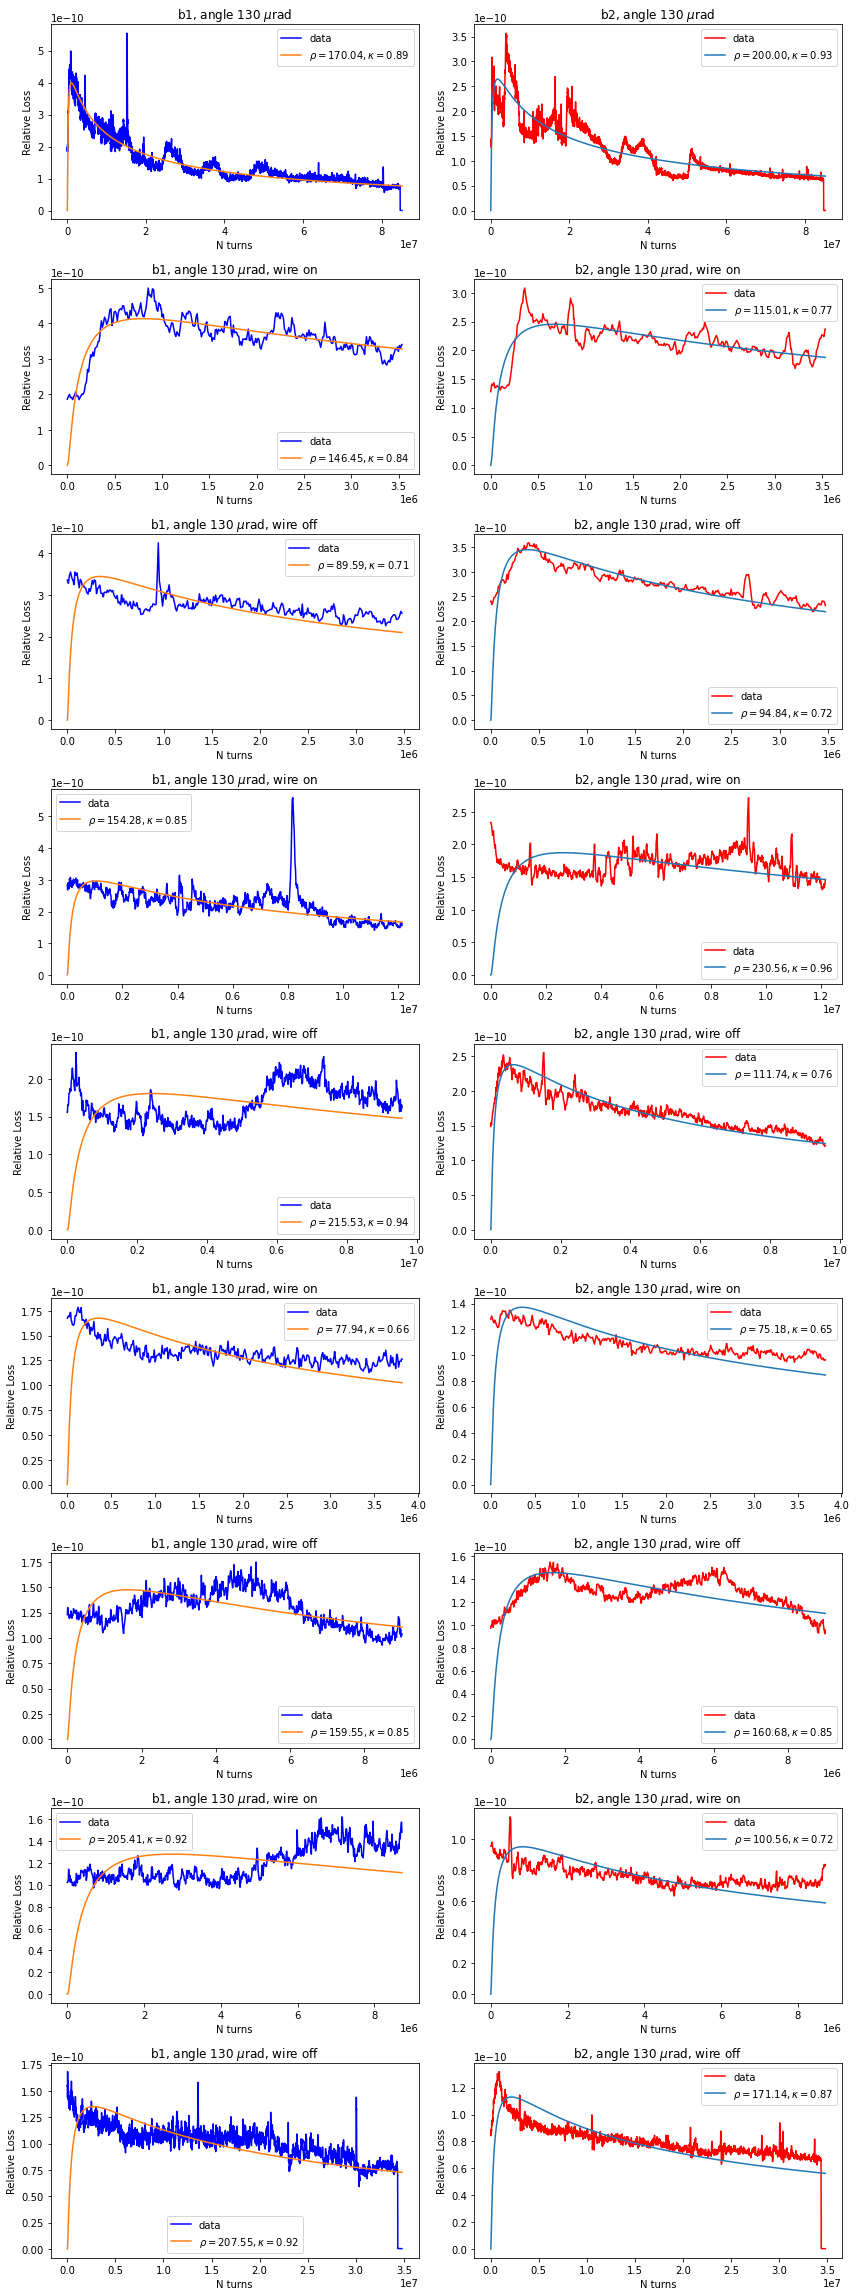

In [420]:
idx = 3
angle = data_dict["angles_only"]["b1"]["angle"][idx]

counter = 0
for j in range(n_samples):
    if data_dict["angles_and_wire"]["b1"]["angle"][j] == angle:
        counter += 1
print(counter)
fig, axs = plt.subplots(counter + 1, 2, figsize=(12, 4 * counter))

result, x, y, original_x = data_dict["angles_only"]["b1"]["results"][idx]
axs[0, 0].plot(x, y, label="data", c="Blue")
axs[0, 0].plot(x, y - result.residual, c="C1",
    label=f"$\\rho={result.params['rho'].value:.2f}, \\kappa={result.params['kappa'].value:.2f}$")
axs[0, 0].set_title(f"b1, angle {data_dict['angles_only']['b1']['angle'][idx]}")
axs[0, 0].legend()
axs[0, 0].set_xlabel("N turns")
axs[0, 0].set_ylabel("Relative Loss")

result, x, y, original_x = data_dict["angles_only"]["b2"]["results"][idx]
axs[0, 1].plot(x, y, label="data", c="Red")
axs[0, 1].plot(x, y - result.residual, c="C0",
    label=f"$\\rho={result.params['rho'].value:.2f}, \\kappa={result.params['kappa'].value:.2f}$")
axs[0, 1].set_title(f"b2, angle {data_dict['angles_only']['b2']['angle'][idx]}")
axs[0, 1].legend()
axs[0, 1].set_xlabel("N turns")
axs[0, 1].set_ylabel("Relative Loss")

counter = 0
for j in range(n_samples):
    if data_dict["angles_and_wire"]["b1"]["angle"][j] == angle:
        counter += 1
        result, x, y, original_x = data_dict["angles_and_wire"]["b1"]["results"][j]
        axs[counter, 0].plot(x, y, label="data", c="Blue")
        axs[counter, 0].plot(x, y - result.residual, c="C1",
            label=f"$\\rho={result.params['rho'].value:.2f}, \\kappa={result.params['kappa'].value:.2f}$")
        axs[counter, 0].set_title(f"b1, angle {data_dict['angles_and_wire']['b1']['angle'][j]}, wire {data_dict['angles_and_wire']['b1']['wire'][j]}")
        axs[counter, 0].legend()
        axs[counter, 0].set_xlabel("N turns")
        axs[counter, 0].set_ylabel("Relative Loss")

        result, x, y, original_x = data_dict["angles_and_wire"]["b2"]["results"][j]
        axs[counter, 1].plot(x, y, label="data", c="Red")
        axs[counter, 1].plot(x, y - result.residual, c="C0",
            label=f"$\\rho={result.params['rho'].value:.2f}, \\kappa={result.params['kappa'].value:.2f}$")
        axs[counter, 1].set_title(f"b2, angle {data_dict['angles_and_wire']['b2']['angle'][j]}, wire {data_dict['angles_and_wire']['b2']['wire'][j]}")
        axs[counter, 1].legend()
        axs[counter, 1].set_xlabel("N turns")
        axs[counter, 1].set_ylabel("Relative Loss")
        
    
plt.tight_layout()

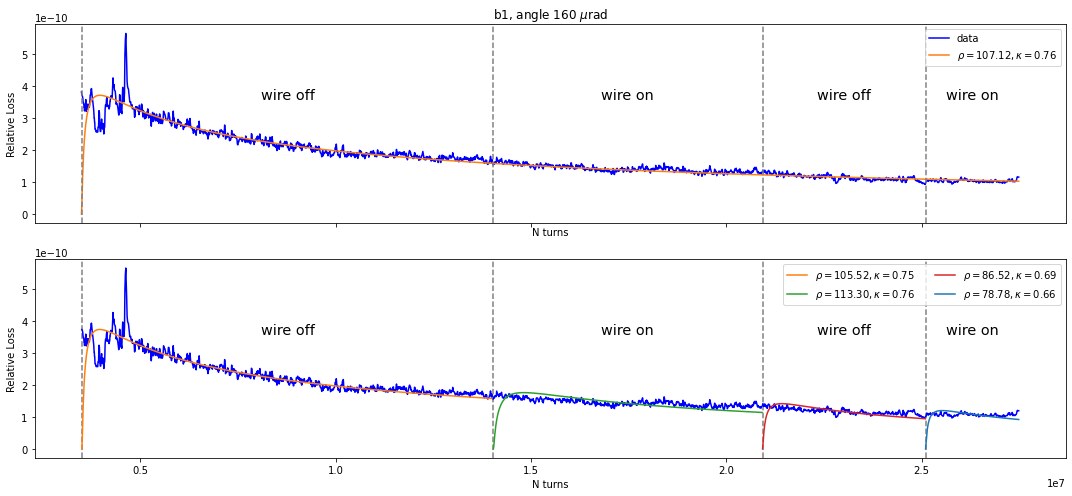

In [456]:
fig, axs = plt.subplots(2, 1, figsize=(15, 7), sharex=True)

idx = 0
angle = data_dict["angles_only"]["b1"]["angle"][idx]

result, x, y, original_x = data_dict["angles_only"]["b1"]["results"][idx]
axs[0].plot(original_x, y, label="data", c="Blue")
axs[0].plot(original_x, y - result.residual, c="C1",
    label=f"$\\rho={result.params['rho'].value:.2f}, \\kappa={result.params['kappa'].value:.2f}$")
axs[0].set_title(f"b1, angle {data_dict['angles_only']['b1']['angle'][idx]}")
axs[0].legend()
axs[0].set_xlabel("N turns")
axs[0].set_ylabel("Relative Loss")

counter = 0
for j in range(n_samples):
    if data_dict["angles_and_wire"]["b1"]["angle"][j] == angle:
        result, x, y, original_x = data_dict["angles_and_wire"]["b1"]["results"][j]
        
        axs[0].axvline(x=original_x[0], c="grey", linestyle="--")
        axs[1].axvline(x=original_x[0], c="grey", linestyle="--")

        # add text in plot between original_x[0] and original_x[-1]
        axs[0].text((original_x[0] + original_x[-1])*0.5, 3.5e-10, f"wire {data_dict['angles_and_wire']['b1']['wire'][j]}", ha="center", va="bottom", fontsize="x-large")
        axs[1].text((original_x[0] + original_x[-1])*0.5, 3.5e-10, f"wire {data_dict['angles_and_wire']['b1']['wire'][j]}", ha="center", va="bottom", fontsize="x-large")
        
        counter += 1
        axs[1].plot(original_x, y, c="Blue")
        axs[1].plot(original_x, y - result.residual, c=["C0", "C1", "C2", "C3"][counter % 4],
            label=f"$\\rho={result.params['rho'].value:.2f}, \\kappa={result.params['kappa'].value:.2f}$")
        
axs[1].legend(ncol=2)
axs[1].set_xlabel("N turns")
axs[1].set_ylabel("Relative Loss")

plt.tight_layout()

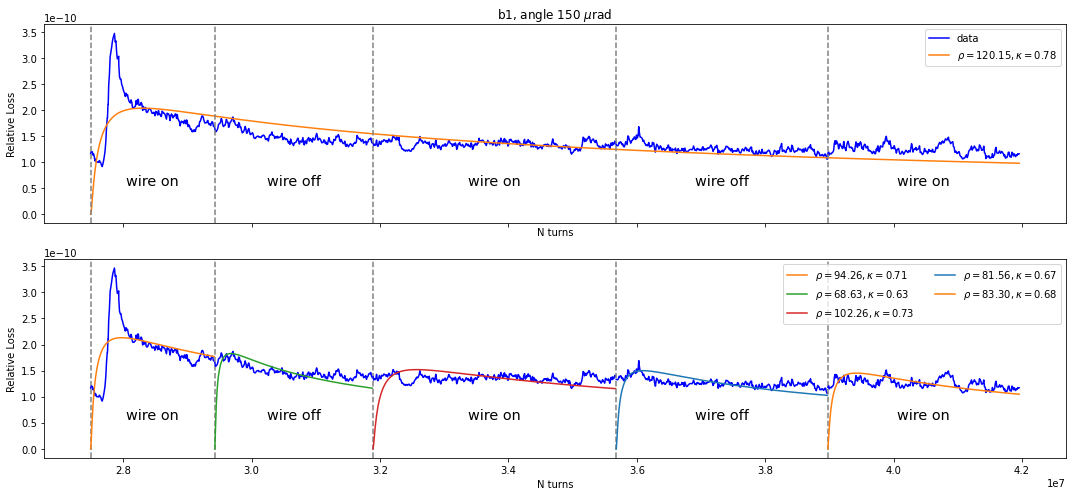

In [469]:
fig, axs = plt.subplots(2, 1, figsize=(15, 7), sharex=True)

idx = 1
angle = data_dict["angles_only"]["b1"]["angle"][idx]

result, x, y, original_x = data_dict["angles_only"]["b1"]["results"][idx]
axs[0].plot(original_x, y, label="data", c="Blue")
axs[0].plot(original_x, y - result.residual, c="C1",
    label=f"$\\rho={result.params['rho'].value:.2f}, \\kappa={result.params['kappa'].value:.2f}$")
axs[0].set_title(f"b1, angle {data_dict['angles_only']['b1']['angle'][idx]}")
axs[0].legend()
axs[0].set_xlabel("N turns")
axs[0].set_ylabel("Relative Loss")

counter = 0
for j in range(n_samples):
    if data_dict["angles_and_wire"]["b1"]["angle"][j] == angle:
        result, x, y, original_x = data_dict["angles_and_wire"]["b1"]["results"][j]
        
        axs[0].axvline(x=original_x[0], c="grey", linestyle="--")
        axs[1].axvline(x=original_x[0], c="grey", linestyle="--")

        # add text in plot between original_x[0] and original_x[-1]
        axs[0].text((original_x[0] + original_x[-1])*0.5, 0.5e-10, f"wire {data_dict['angles_and_wire']['b1']['wire'][j]}", ha="center", va="bottom", fontsize="x-large")
        axs[1].text((original_x[0] + original_x[-1])*0.5, 0.5e-10, f"wire {data_dict['angles_and_wire']['b1']['wire'][j]}", ha="center", va="bottom", fontsize="x-large")
        
        counter += 1
        axs[1].plot(original_x, y, c="Blue")
        axs[1].plot(original_x, y - result.residual, c=["C0", "C1", "C2", "C3"][counter % 4],
            label=f"$\\rho={result.params['rho'].value:.2f}, \\kappa={result.params['kappa'].value:.2f}$")
        
axs[1].legend(ncol=2)
axs[1].set_xlabel("N turns")
axs[1].set_ylabel("Relative Loss")

plt.tight_layout()

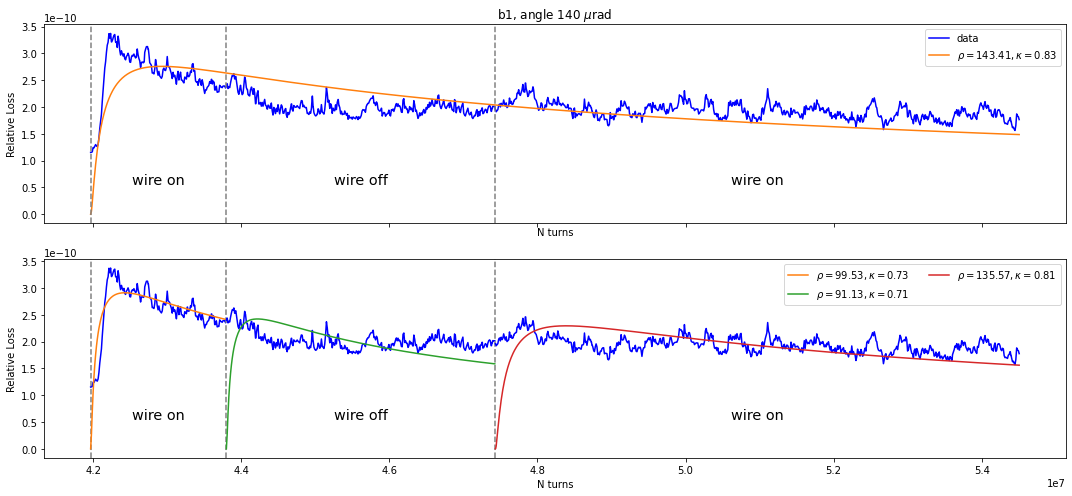

In [458]:
fig, axs = plt.subplots(2, 1, figsize=(15, 7), sharex=True)

idx = 2
angle = data_dict["angles_only"]["b1"]["angle"][idx]

result, x, y, original_x = data_dict["angles_only"]["b1"]["results"][idx]
axs[0].plot(original_x, y, label="data", c="Blue")
axs[0].plot(original_x, y - result.residual, c="C1",
    label=f"$\\rho={result.params['rho'].value:.2f}, \\kappa={result.params['kappa'].value:.2f}$")
axs[0].set_title(f"b1, angle {data_dict['angles_only']['b1']['angle'][idx]}")
axs[0].legend()
axs[0].set_xlabel("N turns")
axs[0].set_ylabel("Relative Loss")

counter = 0
for j in range(n_samples):
    if data_dict["angles_and_wire"]["b1"]["angle"][j] == angle:
        result, x, y, original_x = data_dict["angles_and_wire"]["b1"]["results"][j]
        axs[0].axvline(x=original_x[0], c="grey", linestyle="--")
        axs[1].axvline(x=original_x[0], c="grey", linestyle="--")
        

        # add text in plot between original_x[0] and original_x[-1]
        axs[0].text((original_x[0] + original_x[-1])*0.5, 0.5e-10, f"wire {data_dict['angles_and_wire']['b1']['wire'][j]}", ha="center", va="bottom", fontsize="x-large")
        axs[1].text((original_x[0] + original_x[-1])*0.5, 0.5e-10, f"wire {data_dict['angles_and_wire']['b1']['wire'][j]}", ha="center", va="bottom", fontsize="x-large")

        counter += 1
        axs[1].plot(original_x, y, c="Blue")
        axs[1].plot(original_x, y - result.residual, c=["C0", "C1", "C2", "C3", "C4"][counter % 4],
            label=f"$\\rho={result.params['rho'].value:.2f}, \\kappa={result.params['kappa'].value:.2f}$")
        
axs[1].legend(ncol=2)
axs[1].set_xlabel("N turns")
axs[1].set_ylabel("Relative Loss")

plt.tight_layout()

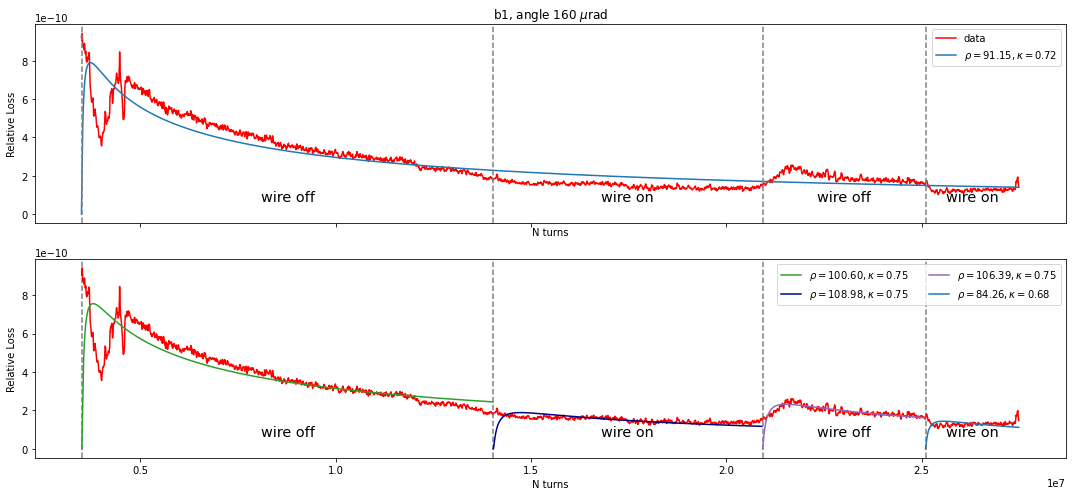

In [462]:
fig, axs = plt.subplots(2, 1, figsize=(15, 7), sharex=True)

idx = 0
angle = data_dict["angles_only"]["b2"]["angle"][idx]

result, x, y, original_x = data_dict["angles_only"]["b2"]["results"][idx]
axs[0].plot(original_x, y, label="data", c="red")
axs[0].plot(original_x, y - result.residual, c="C0",
    label=f"$\\rho={result.params['rho'].value:.2f}, \\kappa={result.params['kappa'].value:.2f}$")
axs[0].set_title(f"b2, angle {data_dict['angles_only']['b1']['angle'][idx]}")
axs[0].legend()
axs[0].set_xlabel("N turns")
axs[0].set_ylabel("Relative Loss")

counter = 0
for j in range(n_samples):
    if data_dict["angles_and_wire"]["b2"]["angle"][j] == angle:
        result, x, y, original_x = data_dict["angles_and_wire"]["b2"]["results"][j]
        
        axs[0].axvline(x=original_x[0], c="grey", linestyle="--")
        axs[1].axvline(x=original_x[0], c="grey", linestyle="--")

        # add text in plot between original_x[0] and original_x[-1]
        axs[0].text((original_x[0] + original_x[-1])*0.5, 0.5e-10, f"wire {data_dict['angles_and_wire']['b2']['wire'][j]}", ha="center", va="bottom", fontsize="x-large")
        axs[1].text((original_x[0] + original_x[-1])*0.5, 0.5e-10, f"wire {data_dict['angles_and_wire']['b2']['wire'][j]}", ha="center", va="bottom", fontsize="x-large")
        
        counter += 1
        axs[1].plot(original_x, y, c="red")
        axs[1].plot(original_x, y - result.residual, c=["C0", "C2", "navy", "C4"][counter % 4],
            label=f"$\\rho={result.params['rho'].value:.2f}, \\kappa={result.params['kappa'].value:.2f}$")
        
axs[1].legend(ncol=2)
axs[1].set_xlabel("N turns")
axs[1].set_ylabel("Relative Loss")

plt.tight_layout()

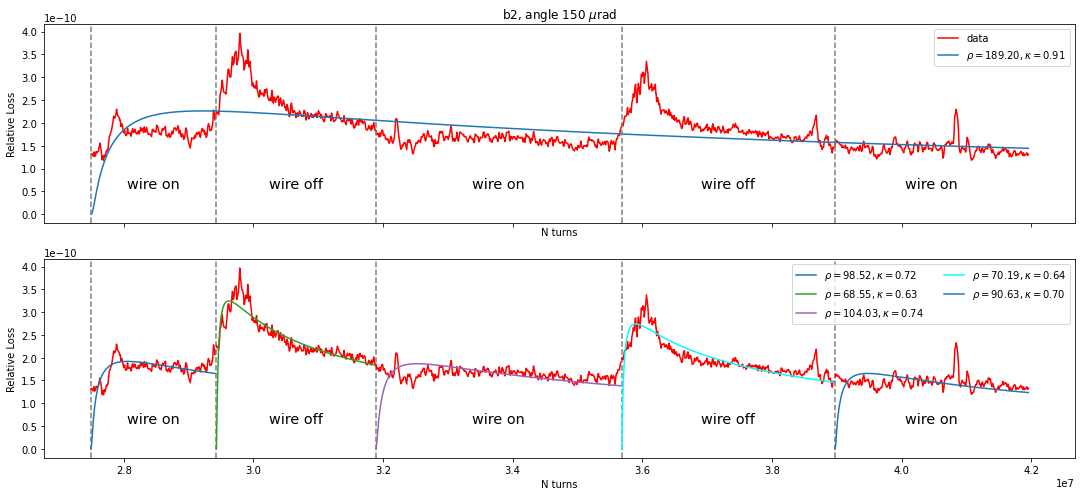

In [470]:
fig, axs = plt.subplots(2, 1, figsize=(15, 7), sharex=True)

idx = 1
angle = data_dict["angles_only"]["b2"]["angle"][idx]

result, x, y, original_x = data_dict["angles_only"]["b2"]["results"][idx]
axs[0].plot(original_x, y, label="data", c="red")
axs[0].plot(original_x, y - result.residual, c="C0",
    label=f"$\\rho={result.params['rho'].value:.2f}, \\kappa={result.params['kappa'].value:.2f}$")
axs[0].set_title(f"b2, angle {data_dict['angles_only']['b2']['angle'][idx]}")
axs[0].legend()
axs[0].set_xlabel("N turns")
axs[0].set_ylabel("Relative Loss")

counter = 0
for j in range(n_samples):
    if data_dict["angles_and_wire"]["b2"]["angle"][j] == angle:
        result, x, y, original_x = data_dict["angles_and_wire"]["b2"]["results"][j]
        axs[0].axvline(x=original_x[0], c="grey", linestyle="--")
        axs[1].axvline(x=original_x[0], c="grey", linestyle="--")
        

        # add text in plot between original_x[0] and original_x[-1]
        axs[0].text((original_x[0] + original_x[-1])*0.5, 0.5e-10, f"wire {data_dict['angles_and_wire']['b2']['wire'][j]}", ha="center", va="bottom", fontsize="x-large")
        axs[1].text((original_x[0] + original_x[-1])*0.5, 0.5e-10, f"wire {data_dict['angles_and_wire']['b2']['wire'][j]}", ha="center", va="bottom", fontsize="x-large")

        counter += 1
        axs[1].plot(original_x, y, c="red")
        axs[1].plot(original_x, y - result.residual, c=["cyan", "C0", "C2", "C4"][counter % 4],
            label=f"$\\rho={result.params['rho'].value:.2f}, \\kappa={result.params['kappa'].value:.2f}$")
        
axs[1].legend(ncol=2)
axs[1].set_xlabel("N turns")
axs[1].set_ylabel("Relative Loss")

plt.tight_layout()

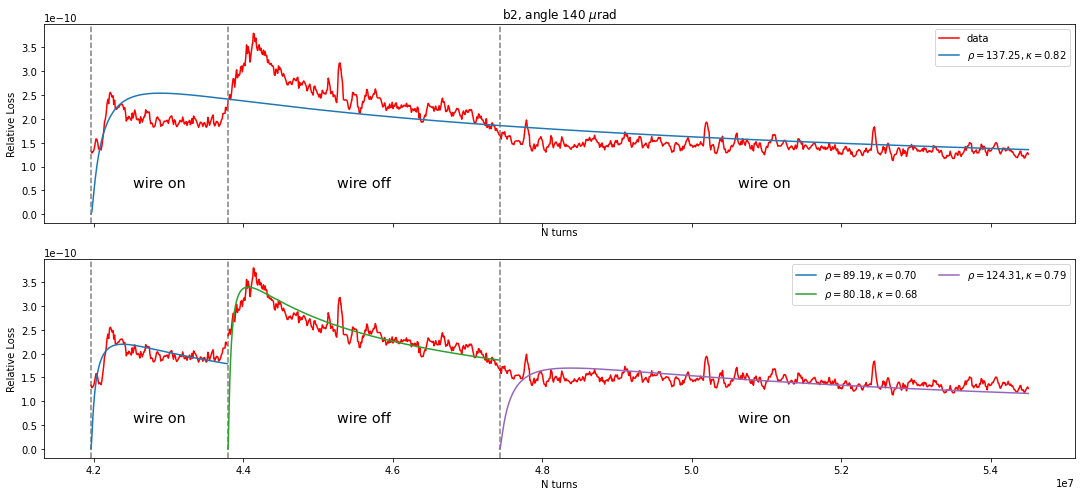

In [ ]:
fig, axs = plt.subplots(2, 1, figsize=(15, 7), sharex=True)

idx = 2
angle = data_dict["angles_only"]["b2"]["angle"][idx]

result, x, y, original_x = data_dict["angles_only"]["b2"]["results"][idx]
axs[0].plot(original_x, y, label="data", c="red")
axs[0].plot(original_x, y - result.residual, c="C0",
    label=f"$\\rho={result.params['rho'].value:.2f}, \\kappa={result.params['kappa'].value:.2f}$")
axs[0].set_title(f"b2, angle {data_dict['angles_only']['b2']['angle'][idx]}")
axs[0].legend()
axs[0].set_xlabel("N turns")
axs[0].set_ylabel("Relative Loss")

counter = 0
for j in range(n_samples):
    if data_dict["angles_and_wire"]["b2"]["angle"][j] == angle:
        result, x, y, original_x = data_dict["angles_and_wire"]["b2"]["results"][j]
        axs[0].axvline(x=original_x[0], c="grey", linestyle="--")
        axs[1].axvline(x=original_x[0], c="grey", linestyle="--")
        

        # add text in plot between original_x[0] and original_x[-1]
        axs[0].text((original_x[0] + original_x[-1])*0.5, 0.5e-10, f"wire {data_dict['angles_and_wire']['b2']['wire'][j]}", ha="center", va="bottom", fontsize="x-large")
        axs[1].text((original_x[0] + original_x[-1])*0.5, 0.5e-10, f"wire {data_dict['angles_and_wire']['b2']['wire'][j]}", ha="center", va="bottom", fontsize="x-large")

        counter += 1
        axs[1].plot(original_x, y, c="red")
        axs[1].plot(original_x, y - result.residual, c=["cyan", "C0", "C2", "C4"][counter % 4],
            label=f"$\\rho={result.params['rho'].value:.2f}, \\kappa={result.params['kappa'].value:.2f}$")
        
axs[1].legend(ncol=2)
axs[1].set_xlabel("N turns")
axs[1].set_ylabel("Relative Loss")

plt.tight_layout()